# Importing the libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing the dataset

In [6]:
data=pd.read_csv("astronauts.csv")
print("Datos listos")

Datos listos


# Data exploration

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 357 non-null    object 
 1   Year                 330 non-null    float64
 2   Group                330 non-null    float64
 3   Status               357 non-null    object 
 4   Birth Date           357 non-null    object 
 5   Birth Place          357 non-null    object 
 6   Gender               357 non-null    object 
 7   Alma Mater           356 non-null    object 
 8   Undergraduate Major  335 non-null    object 
 9   Graduate Major       298 non-null    object 
 10  Military Rank        207 non-null    object 
 11  Military Branch      211 non-null    object 
 12  Space Flights        357 non-null    int64  
 13  Space Flight (hr)    357 non-null    int64  
 14  Space Walks          357 non-null    int64  
 15  Space Walks (hr)     357 non-null    flo

In [8]:
data.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


# What is the most common year

Deleting the `NaN` values and converting them into integers

In [9]:
yearCol=data["Year"].dropna().astype(int)
yearCol.head()

0    2004
2    1984
3    1987
4    1963
5    1987
Name: Year, dtype: int32

Counting how many times a certain value appears

In [10]:
yearCol.value_counts().head()

1978    35
1996    35
1998    25
1990    23
1966    19
Name: Year, dtype: int64

Plotting them in a bar plot

<AxesSubplot:xlabel='Year'>

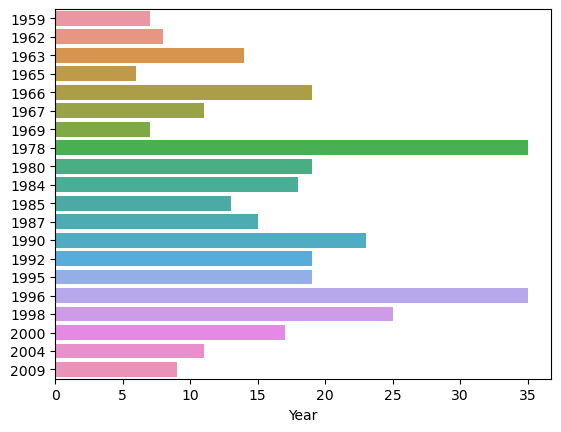

In [11]:
sns.barplot(x=yearCol.value_counts(),y=yearCol.value_counts().index,orient="h")

We can conclude that **1978** and **1996** are the most repeated years

#What is the status of these astronaunts?

<AxesSubplot:ylabel='Status'>

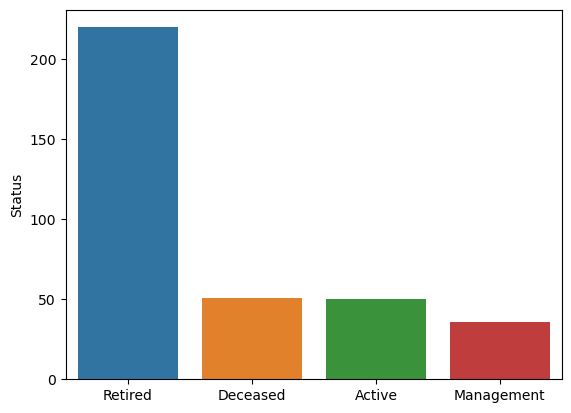

In [12]:
statCol=data["Status"].dropna()
sns.barplot(x=statCol.value_counts().index, y=statCol.value_counts())

We can conclude that most of them are retired

# What is the month with the most births?

Turning the column into datetime type

In [13]:
birthDateCol=pd.to_datetime(data["Birth Date"])
birthDateCol.head()

0   1967-05-17
1   1936-03-07
2   1946-03-03
3   1951-05-20
4   1930-01-20
Name: Birth Date, dtype: datetime64[ns]

Getting the month of birth

In [14]:
freqBirthDateCol=birthDateCol.dt.month.value_counts()
freqBirthDateCol.head()

8     43
5     35
10    34
3     32
11    32
Name: Birth Date, dtype: int64

Text(0.5, 0, 'Month')

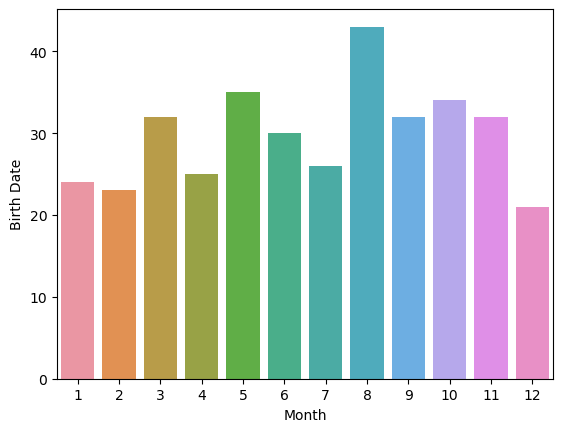

In [15]:
sns.barplot(x=freqBirthDateCol.index, y=freqBirthDateCol)
plt.xlabel("Month")

We can conclude that the 8th month is the month with the most births in that dataset

# What is their military rank?

In [16]:
milRankCol=data["Military Rank"].dropna()

In [17]:
milRankCol.unique()

array(['Colonel', 'Lieutenant Colonel', 'Captain', 'Major General',
       'Commander', 'Lieutenant Commander', 'Brigadier General', 'Major',
       'Lieutenant General', 'Chief Warrant Officer', 'Rear Admiral',
       'Vice Admiral'], dtype=object)

<AxesSubplot:xlabel='Military Rank'>

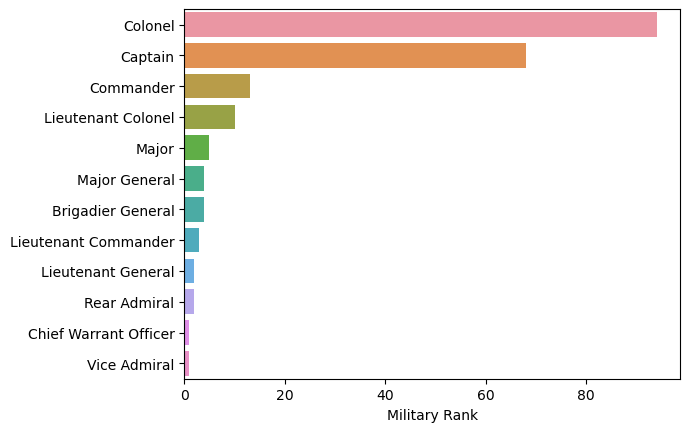

In [18]:
sns.barplot(x=milRankCol.value_counts(),y=milRankCol.value_counts().index,orient="h")

The most common is **Colonel**

# What is the average of the Space Flight, in *hr*

In [19]:
spaceFlightCol=data["Space Flight (hr)"].dropna()

The mean is 

In [20]:
round(spaceFlightCol.mean(),3)

1249.266

<AxesSubplot:ylabel='Space Flight (hr)'>

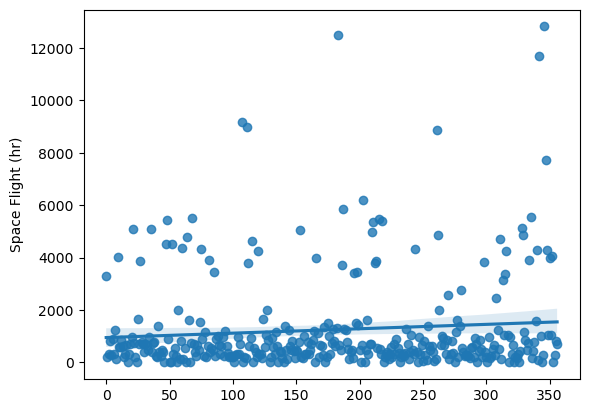

In [21]:
sns.regplot(x=np.array(range(len(spaceFlightCol))),y=spaceFlightCol)